## Importar librerias

* https://code.google.com/archive/p/word2vec/
* https://rare-technologies.com/word2vec-tutorial/
* https://www.guru99.com/word-embedding-word2vec.html

In [0]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Noticias_BCRP/notebooks/")

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
from gensim.models import word2vec
import pickle
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from collections import defaultdict

In [0]:
import sys
### importar libreriar locales
sys.path.append("/content/drive/My Drive/Colab Notebooks/Noticias_BCRP/src")
from plot_word2vec import plot_word2vec
from vectorization_word2vec_boew import vectorization_word2vec

## Word2vec example

In [0]:
from gensim.models import Word2Vec
sentences=[['human', 'interface', 'computer'],
          ['survey', 'user', 'computer', 'system', 'response', 'time'],
          ['eps', 'user', 'interface', 'system'],
          ['system', 'human', 'system', 'eps'],
          ['user', 'response', 'time'],
          ['trees'],
          ['graph', 'trees'],
          ['graph', 'minors', 'trees'],
          ['graph', 'minors', 'survey']]
model = Word2Vec(sentences=sentences, size=100, window=5, min_count=1, sg=0)

In [37]:
model.wv.vocab

{'computer': <gensim.models.keyedvectors.Vocab at 0x7f9ce405a2e8>,
 'eps': <gensim.models.keyedvectors.Vocab at 0x7f9ce405a860>,
 'graph': <gensim.models.keyedvectors.Vocab at 0x7f9ce405a710>,
 'human': <gensim.models.keyedvectors.Vocab at 0x7f9ce405a940>,
 'interface': <gensim.models.keyedvectors.Vocab at 0x7f9ce405a828>,
 'minors': <gensim.models.keyedvectors.Vocab at 0x7f9ce405a780>,
 'response': <gensim.models.keyedvectors.Vocab at 0x7f9ce405ada0>,
 'survey': <gensim.models.keyedvectors.Vocab at 0x7f9ce405ac50>,
 'system': <gensim.models.keyedvectors.Vocab at 0x7f9ce405ae48>,
 'time': <gensim.models.keyedvectors.Vocab at 0x7f9ce405a4a8>,
 'trees': <gensim.models.keyedvectors.Vocab at 0x7f9ce405a8d0>,
 'user': <gensim.models.keyedvectors.Vocab at 0x7f9ce405afd0>}

In [39]:
vector = model.wv['graph']
vector

array([ 1.1304585e-03,  2.6692301e-03,  2.6840304e-03, -2.3994317e-04,
        8.5674704e-04, -2.0839932e-04,  2.2400913e-03,  1.6876595e-03,
        4.6949293e-03,  4.5927735e-03, -7.9486883e-05,  3.8539933e-03,
       -1.4733617e-03, -2.2524854e-03,  4.6446645e-03,  3.6091420e-03,
       -2.4852837e-03,  8.5674773e-04,  6.4069236e-04, -7.8177929e-04,
        1.1040162e-03, -1.8499339e-03, -4.0935972e-03, -1.6095514e-03,
       -3.2460378e-03,  1.6429140e-03,  3.5996202e-03,  2.4707334e-03,
       -1.0784006e-03, -3.8955014e-04, -1.6721567e-03,  1.7213440e-03,
       -5.3194456e-04,  2.0514724e-03, -4.3044547e-03, -1.2912166e-03,
        1.8642326e-03,  1.9349827e-03, -1.4228288e-03, -9.1113837e-04,
       -3.3927744e-03,  3.4226428e-03, -1.6439533e-03,  7.9458189e-04,
        1.6655373e-04, -2.0439047e-03,  4.9249162e-03,  3.8547583e-03,
        8.5971679e-04, -3.1821504e-03,  1.7474601e-03,  4.5164758e-03,
       -2.3454987e-03,  3.7953688e-03,  2.0794754e-03,  3.1988008e-03,
      

In [44]:
model.wv.most_similar("computer")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('graph', 0.14667260646820068),
 ('minors', 0.11020636558532715),
 ('time', 0.09354653209447861),
 ('system', 0.03864916041493416),
 ('human', 0.023488029837608337),
 ('response', 0.007146626710891724),
 ('trees', -0.010380946099758148),
 ('interface', -0.03790326789021492),
 ('survey', -0.07472065091133118),
 ('eps', -0.13477696478366852)]

In [0]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
[('queen', 0.50882536)]
model.doesnt_match("breakfast cereal dinner lunch";.split())
'cereal'
model.similarity('woman', 'man')
0.73723527

In [0]:
# word2vec.Word2Vec()
# sg=0, cbow otherwise skip gram
# hs=0 , negative sampling  otherwise hierarchical softmax
# mincount = 5 , window = 5 por default
# workers , representa los threads
# para cbow con windowns size de 5 y skip-gram de 10
# cbow es mas rapido para el entrenamiento que skip-gram, sin embargo, skip-gram representa mejor palabras raras


# the training algorithm: hierarchical softmax (better for infrequent words) vs negative sampling (better for frequent words, better with low dimensional vectors)


## Cargar train y test

In [0]:
df_train=pd.read_pickle("../data/preprocessed/df_train.pkl")
df_test=pd.read_pickle("../data/preprocessed/df_test.pkl")

In [0]:
y_train=df_train["Target"]
y_test=df_test["Target"]

In [0]:
news_train=[ i.split() for i in df_train["Clean_Stopword_Info"]]
news_test=[ i.split() for i in df_test["Clean_Stopword_Info"]]

## Vectorizacion de noticias - Word2Vec

In [0]:
## Preparando el corpus para el entrenamiento del Word2Vec
archivo=open(file='../models/word2vec/models.txt',mode='w',encoding="utf 8")  
for elemento in news_train:
    strg=" ".join(elemento)
    archivo.write(strg +"\n")
archivo.close()
## Construccion del modelo word2vec 
sentences =word2vec.Text8Corpus('../models/word2vec/models.txt')

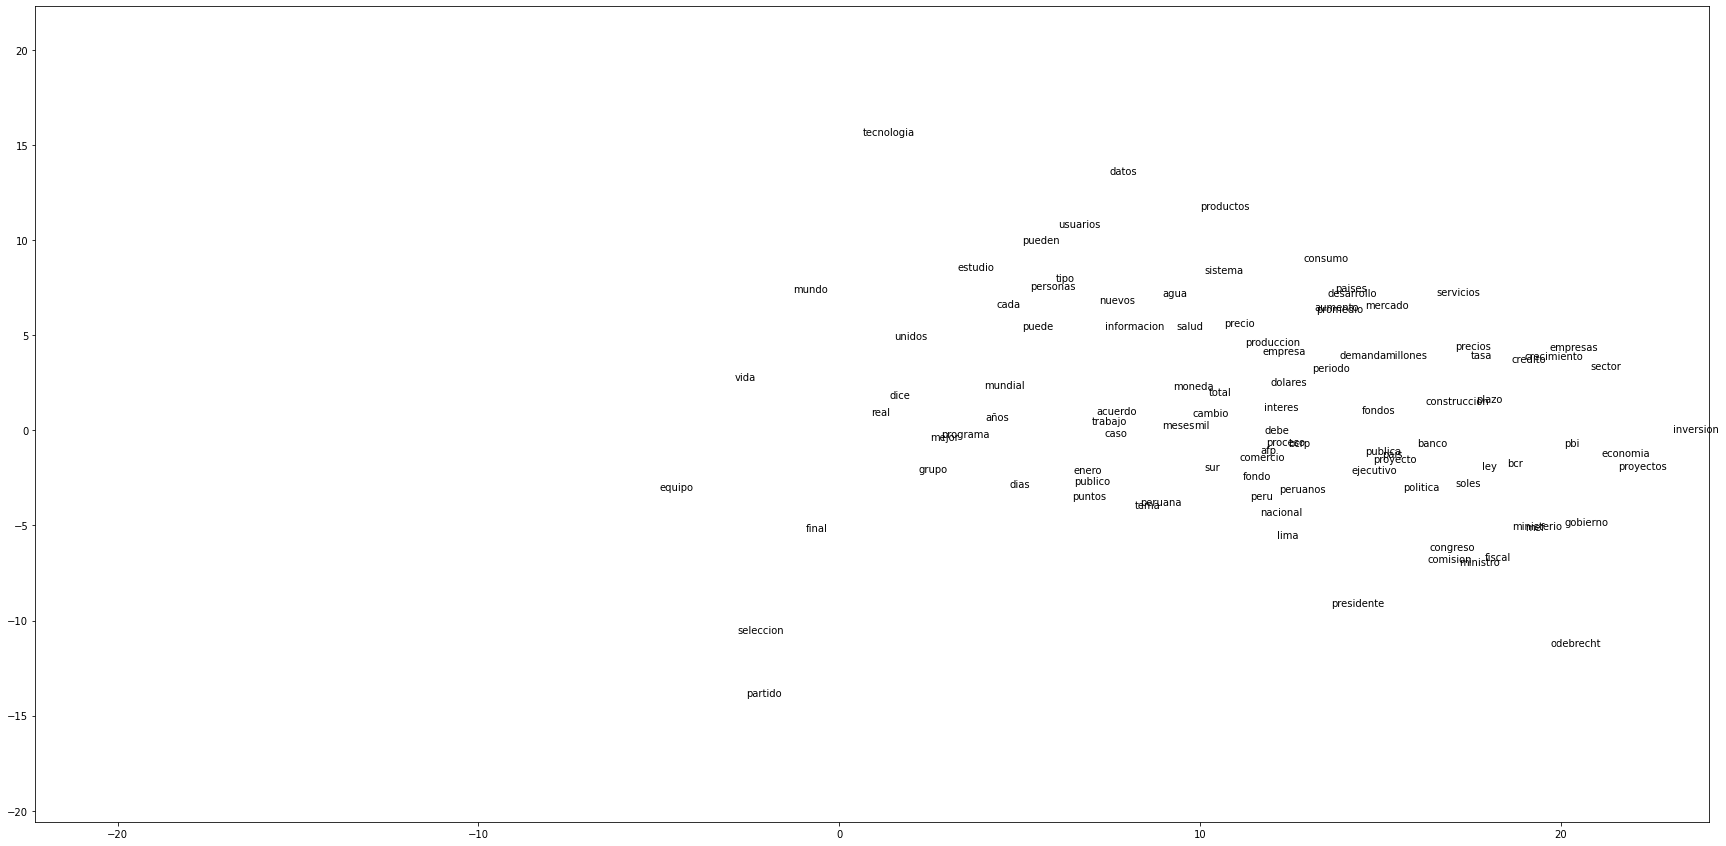

In [0]:
values=[(50,2),(50,5),(50,10),
 (100,2),(100,5),(100,10),
 (200,2),(200,5),(200,10)]
 ## Obtener las 100 palabras mas frecuentes
frequency = defaultdict(int)
for text in news_train:
    for token in text:
        frequency[token] +=1
dict_word_freq={k: v for k, v in sorted(frequency.items(), key=lambda item: item[1],reverse=True)}
word_freq=list(dict_word_freq.keys())[0:100]
plot_word2vec(modelo,word_freq,size_figure=(30,15))

In [0]:
for value in values:
  size=value[0]
  min_count=value[1]
  name_file=str(size)+"_"+str(min_count)
  modelo = word2vec.Word2Vec(sentences,size=size,min_count=min_count)
  ### obtener la vectorizacion word2vec
  word2vec_train=vectorization_word2vec(texts=news_train,modelo=modelo)
  word2vec_test=vectorization_word2vec(texts=news_test,modelo=modelo)
  word2vec_train.shape,word2vec_test.shape
  ## Estandarizar los resultados del word2vec
  word2vec_train=np.asarray(word2vec_train)
  word2vec_test=np.asarray(word2vec_test)
  scaler = StandardScaler() 
  scaler.fit(word2vec_train)###obtiene el valor de la media y la desviacion estandar
  word2vec_train = scaler.transform(word2vec_train) ### normalizar los datos de entrada para el entrenamiento
  word2vec_test = scaler.transform(word2vec_test) ### normalizar los datos de entrada para el entrenamiento
  print(word2vec_train.shape,word2vec_test.shape)
  ### guardar el modelo word2vec
  pickle.dump(modelo,open("../models/word2vec/modelo{}.pkl".format(name_file),"wb"))
  ### guardar el valor estandar
  pickle.dump(scaler,open("../models/word2vec/scaler{}.pkl".format(name_file),"wb"))
  ### Guarda la vectorizacion word2vec
  np.save("../data/preprocessed/word2vec/word2vec_train{}.npy".format(name_file),word2vec_train)
  np.save("../data/preprocessed/word2vec/word2vec_test{}.npy".format(name_file),word2vec_test)
  ### guardar el modelo construido de word2vec

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(48957, 50) (12240, 50)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(48957, 50) (12240, 50)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(48957, 50) (12240, 50)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(48957, 100) (12240, 100)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(48957, 100) (12240, 100)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(48957, 100) (12240, 100)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(48957, 200) (12240, 200)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(48957, 200) (12240, 200)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(48957, 200) (12240, 200)
